# r/mentalhealth Worldcloud
Collecting user comments from r/mentalhealth and creating a Word Cloud out of the most used words.

https://www.reddit.com/r/mentalhealth/

In [1]:
import pandas as pd
import os
import requests
import json
import csv
import time
import datetime
from pprint import pprint
import pandas as pd
from wordcloud import WordCloud
import nltk
import ssl

try:
    _create_unverified_https_context = ssl._create_unverified_context
except AttributeError:
    pass
else:
    ssl._create_default_https_context = _create_unverified_https_context
nltk.download('wordnet')

import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.stem.porter import *
import numpy as np
np.random.seed(2018)

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\YUNUS\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


# Creating a time frame with timestamps.
You can use https://www.timestampconvert.com/ to create your own timestamps.

In [2]:
TIME_20200301 = '1583020800'
TIME_20200401 = '1585770412'

# Importing the Pushshift API elements to collect data

In [3]:
def getData(search_query, before, after, sub_reddit_name):
    url = 'https://api.pushshift.io/reddit/search/submission/?q=' + \
        str(search_query) + '&size=1000&after=' + str(after) + '&before=' + \
        str(before) + '&subreddit=' + str(sub_reddit_name)
    
    result = requests.get(url)
    
    try:
        data = json.loads(result.text)
    except:
        print('Exceeding the 200 requests per minute limit.')
        print('Waiting for 60 seconds...')
        time.sleep(60)
        result = requests.get(url)
        data = json.loads(result.text)
        
    return data['data']

def collectSubmissions(submission):
    try:
        body = submission['selftext']
    except KeyError:
        body = '[removed]'

    if body == '' or body == '[removed]' or body == '[deleted]':
        return
    
    submission_data = list()
    title = submission['title']
    submission_id = submission['id']
    score = submission['score']
    num_comments = submission['num_comments']
    full_link = '=HYPERLINK("' + submission['full_link'] + '")'
    created = datetime.datetime.fromtimestamp(submission['created_utc']) #1520561700.0
    try:
        link_flair_text = submission['link_flair_text']
    except KeyError:
        link_flair_text = ''
        
    if link_flair_text == '':
        submission_data.append((submission_id, title, body, score, num_comments, full_link, created, link_flair_text))
        sub_stats[submission_id] = submission_data

def dataFile(stats, filename):
    upload_count = 0
    with open(filename, 'w', newline='', encoding='utf-8') as file: 
        file_writer = csv.writer(file, delimiter=',')
        headers = ['ID', 'Title', 'Body', 'Score', 'Comments', 'Link', 'Date', 'flair']
        file_writer.writerow(headers)
        for sub in stats:
            file_writer.writerow(stats[sub][0])
            upload_count += 1
            
        print(str(upload_count) + " submissions have been uploaded to file: " + filename)

# Collecting the data from our subreddit r/mentalhealth

In [4]:
sub_reddit = 'mentalhealth'
query = ''
before = TIME_20200401
after = TIME_20200301

application_folder = 'data_application'
os.makedirs(application_folder, exist_ok=True)
csv_filename = application_folder + '/' + sub_reddit + '.csv'
excel_filename = application_folder + '/' + sub_reddit + '.xlsx'

sub_stats = {}

data = getData(query, before, after, sub_reddit)

while len(data) > 0:
    for submission in data:
        collectSubmissions(submission)
        
    print(str(datetime.datetime.fromtimestamp(data[-1]['created_utc'])))
    after = data[-1]['created_utc']
    
    data = getData(query, before, after, sub_reddit)

dataFile(sub_stats, csv_filename)

2020-03-01 16:22:28
2020-03-02 03:52:47
2020-03-02 16:37:12
2020-03-03 02:11:23
2020-03-03 10:14:26
2020-03-03 23:38:10
2020-03-04 11:46:09
2020-03-05 00:35:56
2020-03-05 08:11:55
2020-03-05 23:33:04
2020-03-06 09:40:29
2020-03-07 01:27:34
2020-03-07 16:30:09
2020-03-08 04:44:19
2020-03-08 19:53:21
2020-03-09 05:53:22
2020-03-09 20:14:44
2020-03-10 06:26:22
2020-03-10 19:19:47
2020-03-11 05:14:19
2020-03-11 20:11:45
2020-03-12 06:18:38
2020-03-12 21:37:48
2020-03-13 08:46:09
2020-03-13 22:21:26
2020-03-14 08:21:23
2020-03-14 23:53:40
2020-03-15 10:29:33
2020-03-15 23:55:20
2020-03-16 10:37:18
2020-03-17 00:04:44
2020-03-17 12:12:05
2020-03-18 01:46:14
2020-03-18 16:01:52
2020-03-19 02:32:05
2020-03-19 17:39:48
2020-03-20 05:05:14
2020-03-20 19:48:35
2020-03-21 04:51:51
2020-03-21 17:14:27
2020-03-22 04:54:31
2020-03-22 18:10:30
2020-03-23 04:30:58
2020-03-23 18:54:41
2020-03-24 03:45:32
2020-03-24 16:34:56
2020-03-25 03:00:35
2020-03-25 17:07:36
2020-03-26 04:46:10
2020-03-26 17:57:19


# Generating our World Cloud

WordCloud image data_application/mentalhealth.png is created.


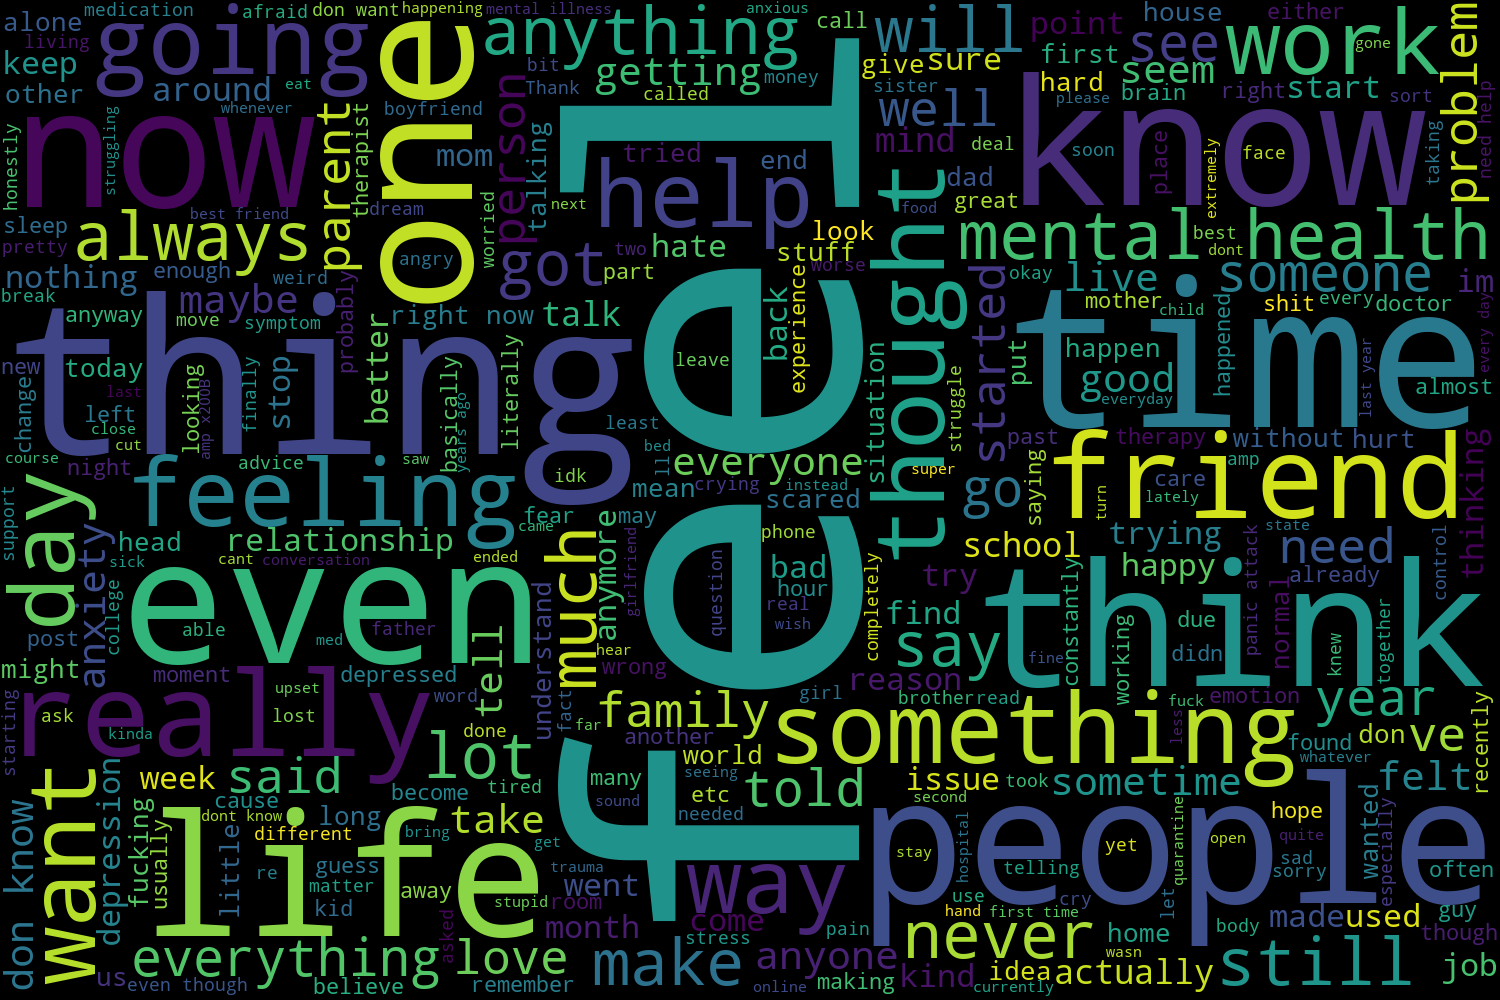

In [5]:
wordcloud_filename = application_folder + '/' + sub_reddit + '.png'

data = pd.read_csv(csv_filename)

content = ''
for index, row in data.iterrows():        
    content += ' ' + str(row['Title']) + ' ' + str(row['Body'])

wordcloud = WordCloud(
                      # background_color = 'white',
                      width = 1500, height = 1000,
                      min_font_size = 15,
                      max_words = 1000,
                      contour_width = 3, contour_color = 'steelblue').generate(content)

wordcloud.to_file(wordcloud_filename)
print('WordCloud image ' + wordcloud_filename + ' is created.')
wordcloud.to_image()

##### Using this word cloud, we can make assumptions about what words people are most likely to use when they're talking about mental health.